In [1]:
import pandas as pd
#Load libraries
from sklearn.preprocessing import PowerTransformer
import numpy as np
from kmodes.kprototypes import KPrototypes
#Load libraries
from matplotlib import style
from lightgbm import LGBMClassifier
import shap
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#Load library
from sklearn.preprocessing import LabelEncoder
import os
import random

/apps/jupyterhub/2019-04-29/miniconda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/apps/jupyterhub/2019-04-29/miniconda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/apps/jupyterhub/2019-04-29/miniconda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/apps/jupyterhub/2019-04-29/miniconda

In [2]:
df_unsup = pd.read_csv('/rds/general/user/md2620/home/asthma/Malo/Dataframes/Final/df_for_results_unsup_Oct24.csv', low_memory=False)

In [3]:
df_unsup.head(5)

,Unnamed: 0,Biomarker.C5a.pg.ml.serum,Biomarker.CD30.pg.ml.serum,Biomarker.CD40L.pg.ml.serum,Biomarker.DPPIV.pg.ml.serum,Biomarker.Galectin.3.pg.ml.serum,Biomarker.IL.18.pg.ml.serum,Biomarker.IL.1alpha.pg.ml.serum,Biomarker.IL.6Ralpha.pg.ml.serum,Biomarker.LBP.pg.ml.serum,...,Questions.Screening.Env.Factors.Other.3,Questions.Screening.Number.Of.Children,Questions.Screening.Number.Of.Siblings,Questions.Screening.Smoking.Cigarettes,Questions.Screening.Smoking.Cigars,Questions.Screening.Smoking.Pipe,Sex,Race,cohort,cluster_optimal
0,A_237,30,77,7395,119595,6497,558,31,11489,2769969,...,0,3.0,0.0,1,0,0,male,white_caucasian,Severe,3
1,A_132,21,37,7517,80984,4594,397,37,16298,2614841,...,0,2.0,1.0,0,0,0,female,white_caucasian,Healthy,3
2,A_074,32,46,6775,216071,5379,453,32,12639,1771448,...,0,0.0,1.0,0,0,0,female,white_caucasian,Healthy,1
3,A_335,66,38,3334,91777,9453,305,36,11089,2830887,...,0,0.0,3.0,0,0,0,male,white_caucasian,Severe,2
4,A_418,44,41,3925,200474,4055,249,39,11176,1820564,...,0,3.0,2.0,0,0,0,female,white_caucasian,Severe_Smoker,2


In [8]:
#Check variable types for specific columns using:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df_unsup.iloc[:,343:348].dtypes

Questions.Screening.Smoking.Pipe     int64
Sex                                 object
Race                                object
cohort                              object
cluster_optimal                      int64
dtype: object

In [11]:
#Set Unnamed: 0 as index of df_sup_proto
df_unsup= df_unsup.set_index('Unnamed: 0')

In [18]:
# select a column as series and then convert it into a column
labels = df_unsup['cluster_optimal'].values().tolist()

TypeError: 'numpy.ndarray' object is not callable

In [13]:
labels

[3,
 3,
 1,
 2,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 3,
 3,
 2,
 3,
 3,
 1,
 1,
 1,
 3,
 3,
 1,
 1,
 3,
 1,
 3,
 2,
 1,
 2,
 2,
 3,
 2,
 1,
 1,
 1,
 1,
 3,
 2,
 3,
 1,
 3,
 1,
 1,
 3,
 1,
 2,
 1,
 3,
 1,
 1,
 3,
 2,
 3,
 3,
 1,
 3,
 1,
 3,
 3,
 1,
 1,
 1,
 2,
 3,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 3,
 3,
 3,
 1,
 1,
 3,
 1,
 2,
 1,
 3,
 2,
 2,
 3,
 1,
 3,
 2,
 1,
 2,
 3,
 1,
 3,
 2,
 1,
 3,
 3,
 3,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 1,
 1,
 3,
 3,
 1,
 1,
 1,
 3,
 1,
 1,
 3,
 3,
 1,
 3,
 2,
 1,
 2,
 3,
 3,
 3,
 3,
 1,
 3,
 1,
 3,
 3,
 1,
 1,
 1,
 1,
 3,
 1,
 3,
 3,
 1,
 1,
 3,
 2,
 2,
 2,
 3,
 3,
 1,
 3,
 3,
 1,
 3,
 3,
 3,
 1,
 3,
 3,
 3,
 1,
 1,
 1,
 2,
 3,
 3,
 2,
 1,
 1,
 1,
 3,
 3,
 3,
 1,
 3,
 1,
 2,
 3,
 3,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 3,
 3,
 1,
 3,
 3,
 2,
 3,
 3,
 1,
 1,
 3,
 2,
 2,
 1,
 3,
 3,
 3,
 1,
 2,
 1,
 1,
 3,
 3,
 1,
 3,
 3,
 3,
 2,
 1,
 1,
 2,
 3,
 1,
 2,
 1,
 1,
 3,
 2,
 3,
 1,
 1,
 2,
 2,
 3,
 1,
 1,
 1,
 3,
 3,
 1,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 1,
 1,


In [21]:
#Drop a few columns from df_sup to run k-prototypes (K=2 to 10)
df_unsup_proto = df_unsup.drop(['cluster_optimal'], axis = 1)

In [22]:
#Make a copy of df_sup_proto and set the objects to category 
df_unsup_copy = df_unsup_proto.copy()
for i in df_unsup_copy.select_dtypes(include='object'):
    df_unsup_copy[i] = df_unsup_copy[i].astype('category')

In [23]:
#Use of LightGBM as my classifier because it handles categorical variables and because it is relatively fast to obtain shap values for the trained models.
clf_unsup_K2 = LGBMClassifier(colsample_by_tree=0.8)
cv_scores_unsup_K2 = cross_val_score(clf_unsup_K2, df_unsup_copy, labels, scoring='f1_weighted')
print(f'CV F1 score for K-Prototypes clusters is {np.mean(cv_scores_unsup_K2)}')
#CV score of 0.9245 (close to 1)meaning that the observations are grouped in meaningful and distinguishable clusters.

CV F1 score for K-Prototypes clusters is 0.9278949004219136


In [24]:
clf_unsup_K2.fit(df_unsup_copy, labels)

LGBMClassifier(colsample_by_tree=0.8)

In [25]:
explainer_unsup_K2 = shap.TreeExplainer(clf_unsup_K2)
shap_values_unsup_K2 = explainer_unsup_K2.shap_values(df_unsup_copy)

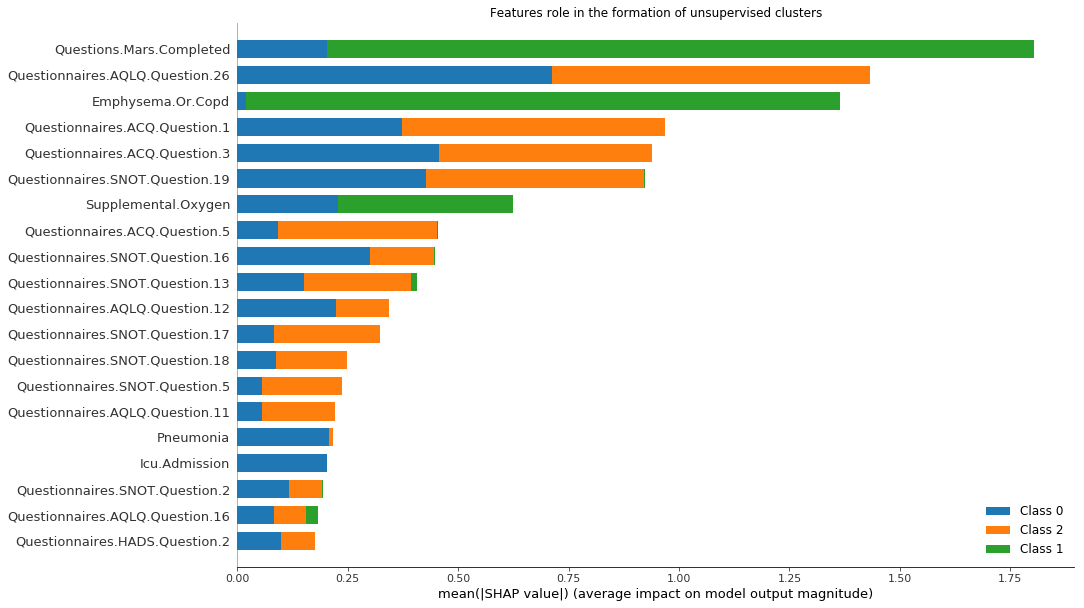

In [26]:
shap.summary_plot(shap_values_unsup_K2, df_unsup_copy, plot_type="bar", plot_size=(15, 10),color=plt.get_cmap("tab10"),show=False)
ax = plt.gca()
plt.title("Features role in the formation of unsupervised clusters")
#import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results/SHAP_UNSUP")
plt.savefig('shap_plot_3_clusters_unsup_oct26.pdf',format='pdf', dpi=1000, bbox_inches='tight')

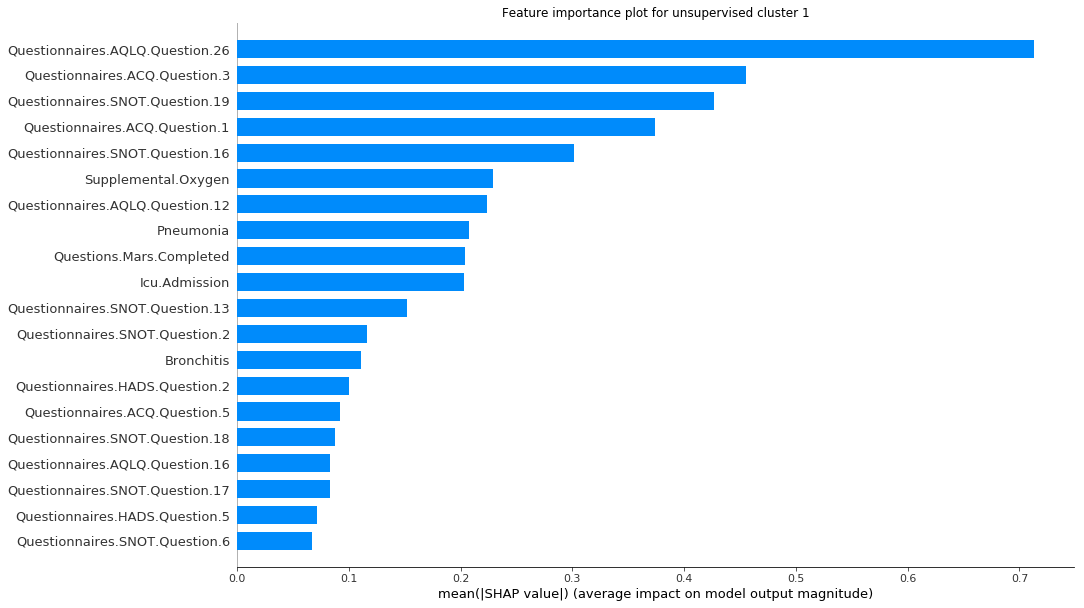

In [27]:
shap.summary_plot(shap_values_unsup_K2[0], df_unsup_copy, plot_type="bar", plot_size=(15, 10),show=False)
ax = plt.gca()
plt.title("Feature importance plot for unsupervised cluster 1")
#import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results/SHAP_UNSUP")
plt.savefig('shap_plot_clust1_unsup_oct26.pdf',format='pdf', dpi=1000, bbox_inches='tight')

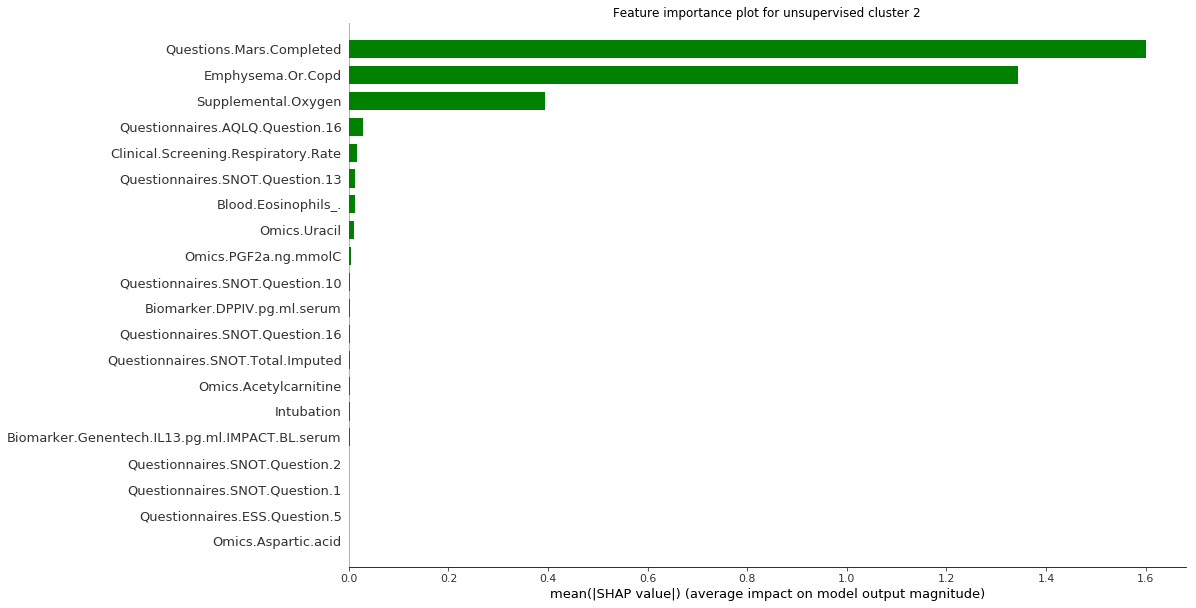

In [29]:
shap.summary_plot(shap_values_unsup_K2[1], df_unsup_copy, plot_type="bar", plot_size=(15, 10),color = "green",show=False)
ax = plt.gca()
plt.title("Feature importance plot for unsupervised cluster 2")
#import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results/SHAP_UNSUP")
plt.savefig('shap_plot_clust2_unsup_oct26.pdf',format='pdf', dpi=1000, bbox_inches='tight')

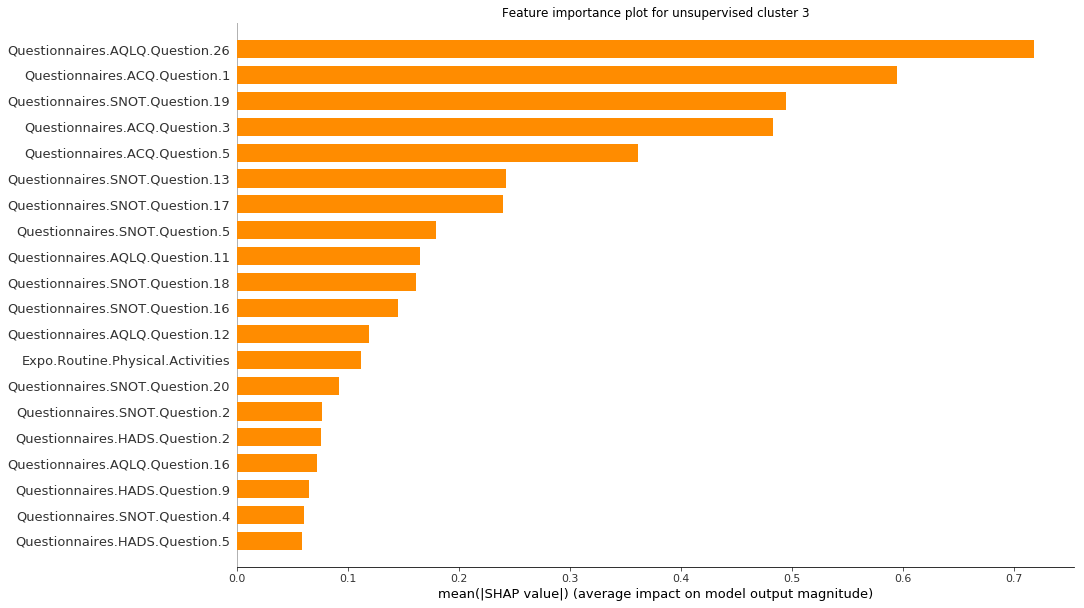

In [31]:
shap.summary_plot(shap_values_unsup_K2[2], df_unsup_copy, plot_type="bar", plot_size=(15, 10),color = "darkorange",show=False)
ax = plt.gca()
plt.title("Feature importance plot for unsupervised cluster 3")
#import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results/SHAP_UNSUP")
plt.savefig('shap_plot_clust2_unsup_oct26.pdf',format='pdf', dpi=1000, bbox_inches='tight')